In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("data/Iris.csv") #Load the dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [1]:
#Understanding the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Dataset Preprocessing

In [10]:
df['Target'] = df['PetalLengthCm'].apply(lambda x: 0 if x < 2.5 else 1)

In [11]:
X = df.drop(['Id', 'Target'], axis=1)
y = df['Target']

In [18]:
X = X.select_dtypes(include=['float64', 'int64'])
# X = df.drop(['Id', 'Target', 'Species'], axis=1, errors='ignore')

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train-Test Split (Model Selection)

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#KNN Classifiers using KNeighborsClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [3]:
#Making predictions using the trained model

In [31]:
y_pred = knn.predict(X_test)

In [33]:
#Trying different values of K and store their accuracies

In [34]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [35]:
k_range = range(1,21)
accuracies = []

In [37]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [ ]:
#Plotting the Evaluation of the model using their accuracies (Accuracy vs K)

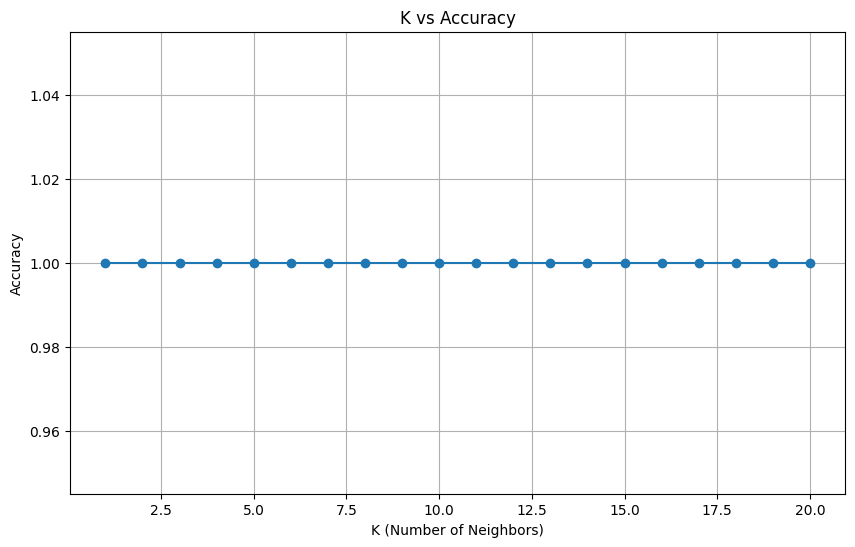

In [45]:
plt.figure(figsize=(10,6))
plt.plot(k_range, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
#Choosing the best K (using  metrics)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
best_k = 5
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
#1. Confusion matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[10  0]
 [ 0 20]]


In [52]:
#2. Accuracy

In [53]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


In [54]:
#(precision, recall, F1)

In [55]:
print("Classfication Report:\n", classification_report(y_test, y_pred))

Classfication Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
#Visualizing the Decision Boundaries

In [56]:
from matplotlib.colors import ListedColormap
import numpy as np

In [57]:
X_vis = X_scaled[:, :2]
y_vis = y

In [59]:
#Re-spliting for 2D

In [60]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

In [61]:
# Fit on 2D

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vis, y_train_vis)

KNeighborsClassifier()

In [64]:
#Creating a meshgrid

In [66]:
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [67]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
#Plotting KNN Decision Boundary

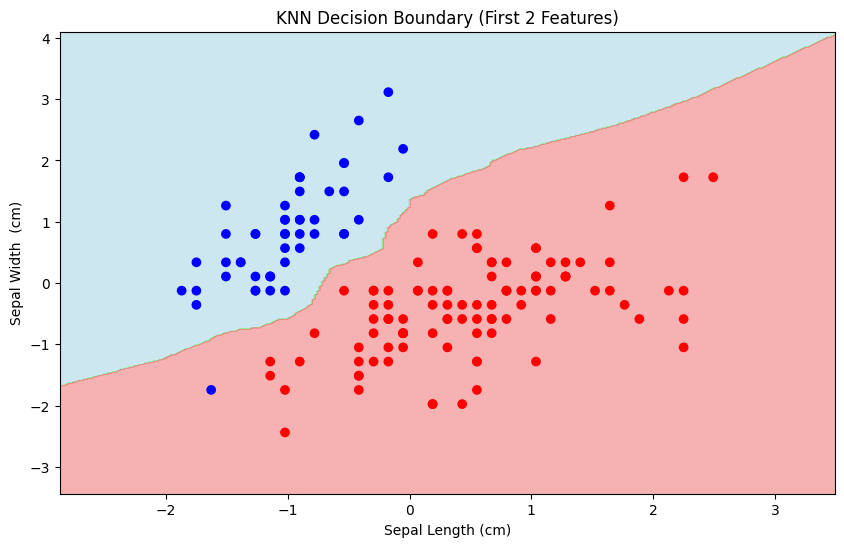

In [70]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightgreen', 'lightcoral')), alpha=0.6)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=ListedColormap(('blue', 'green', 'red')))
plt.title("KNN Decision Boundary (First 2 Features)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width  (cm)")
plt.show()